In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PythonApplication1 import *

<Figure size 640x480 with 1 Axes>

# Laden der Daten

In [3]:
truth = readData("truth")
data = readData("data")

measurements = data.filter(regex='^z')
controlIn = data.filter(regex='^u')

z = measurements.to_numpy()
u = controlIn.to_numpy()

xgt = truth.to_numpy()

# Darstellung Messdaten und ControllInput

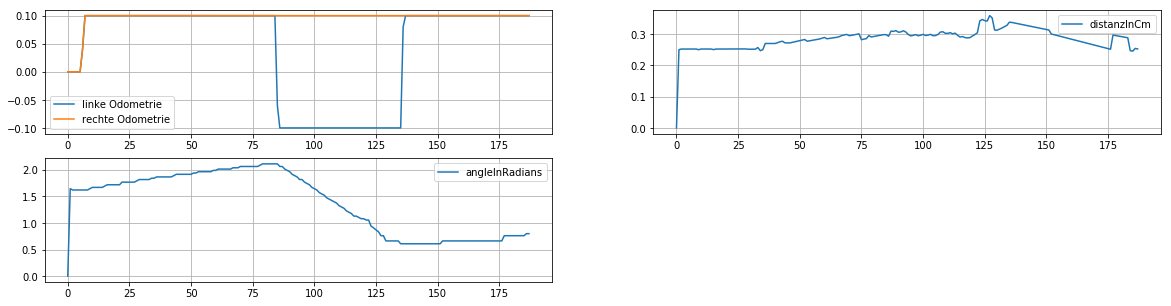

In [4]:
#z = [linkeOdometrie, rechteOdometrie, distanzInCm, angleInRadians]
plt.figure(figsize=(20, 5))
ax = plt.subplot(221)
ax.plot(z[:, 0], label='linke Odometrie')
ax.plot(z[:, 1], label='rechte Odometrie')
ax.legend()
ax.grid()

ax = plt.subplot(222)
ax.plot(z[:, 2], label='distanzInCm')
ax.legend()
ax.grid()

ax = plt.subplot(223)
ax.plot(z[:, 3], label='angleInRadians')
ax.legend()
ax.grid()





# Darstellung Prediction, ControllInput und GT

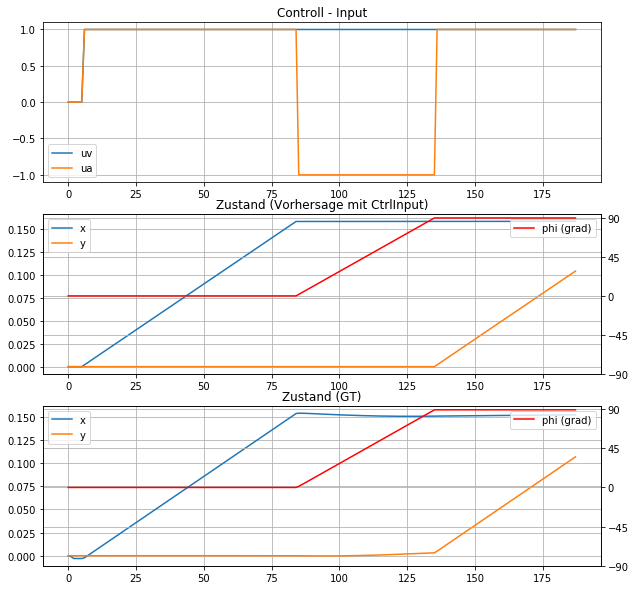

In [5]:
N = u.shape[0]
x = np.array([0., 0, 0])
dt = .1
xvec = []
for k in range(N):
    uk = u[k,:]
    zk = z[k,:]
    
    x = state_trans(x, dt, uk)
    xvec.append(x)
    
xvec = np.array(xvec)

plt.figure(figsize=(10, 10))
ax = plt.subplot(312)
ax.plot(xvec[:,0], label='x')
ax.plot(xvec[:,1], label='y')
ax.legend()
ax.grid()

ax = ax.twinx()
ax.plot(xvec[:,2]*180/np.pi, label='phi (grad)', color='r')
ax.legend()
ax.set_title('Zustand (Vorhersage mit CtrlInput)')
ax.set_yticks(np.arange(-2,3)*45)
ax.grid()

ax = plt.subplot(311)
ax.plot(u[:,0], label='uv')
ax.plot(u[:,1], label='ua')
ax.set_title('Controll - Input')
ax.legend()
ax.grid()

ax = plt.subplot(313)
ax.plot(xgt[:,0], label='x')
ax.plot(xgt[:,1], label='y')
ax.legend()
ax.grid()

ax = ax.twinx()
ax.plot(xgt[:,2]*180/np.pi, label='phi (grad)', color='r')
ax.legend()
ax.set_title('Zustand (GT)')
ax.set_yticks(np.arange(-2,3)*45)
ax.grid()



# Darstellung der Messdaten

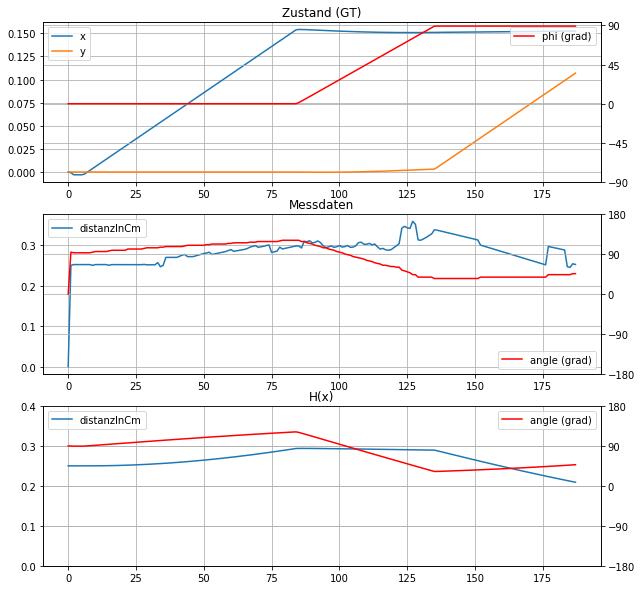

In [6]:
plt.figure(figsize=(10, 10))

N = u.shape[0]
x = np.array([0., 0, 0, 0, 0])
dt = .1
zhatvec = []

beacon_posxy = [0, 0.25]

for k in range(N):
    uk = u[k,:]
    zk = z[k,:]
    xgtk = np.array([xgt[k,0], xgt[k,1], xgt[k,2], beacon_posxy[0], beacon_posxy[1]])
    zhat = measurement_trans(xgtk, uk, dt)
    zhatvec.append(zhat)
    
zhatvec = np.array(zhatvec)



ax = plt.subplot(311)
ax.plot(xgt[:,0], label='x')
ax.plot(xgt[:,1], label='y')
ax.legend()
ax.grid()

ax = ax.twinx()
ax.plot(xgt[:,2]*180/np.pi, label='phi (grad)', color='r')
ax.legend()
ax.set_title('Zustand (GT)')
ax.set_yticks(np.arange(-2,3)*45)
ax.grid()


ax = plt.subplot(312)
ax.plot(z[:, 2], label='distanzInCm')
ax.legend(loc='upper left')
ax.grid()

ax = ax.twinx()
ax.plot(z[:, 3]*180/np.pi, label='angle (grad)', color='r')
ax.legend(loc='lower right')
ax.set_yticks(np.arange(-2,3)*90)
ax.set_title('Messdaten')
ax.grid()

ax = plt.subplot(313)
ax.plot(zhatvec[:, 2], label='distanzInCm')
ax.set_yticks(np.arange(0, 5) * 0.1)
ax.legend(loc='upper left')
ax.grid()

ax = ax.twinx()
ax.plot(zhatvec[:, 3]*180/np.pi, label='angle (grad)', color='r')
ax.legend()
ax.set_yticks(np.arange(-2,3)*90)
ax.set_title('H(x)')
ax.grid()

